In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypdf import PdfReader
from sklearn import metrics
from sklearn.cluster import AffinityPropagation

In [155]:
pdfReader=PdfReader('Terminplan-ws-2023-2024.pdf')
pdfReader

In [156]:
def getDataOfPdfPage(page):
    df=pd.DataFrame(columns=["text", "currentTransformationMatrix", "textMatrix", "fontDictionary", "fontSize"])
    def visitor_text(
        text, currentTransformationMatrix, textMatrix, fontDictionary, fontSize
    ):
        if(len(text.strip())<=0):
            return
        # print(fontDictionary)
        df.loc[len(df)]=[text, currentTransformationMatrix, textMatrix, fontDictionary, fontSize]
    page.extract_text(visitor_text=visitor_text)

    df[["currentTransformationMatrix0","currentTransformationMatrix1","currentTransformationMatrix2","currentTransformationMatrix3","currentTransformationMatrix4","currentTransformationMatrix5"]]=pd.DataFrame(df["currentTransformationMatrix"].tolist(), index= df.index)
    df.drop(columns=["currentTransformationMatrix"], inplace=True)
    df[["textMatrix0","textMatrix1","textMatrix2","textMatrix3","textMatrix4","textMatrix5"]]=pd.DataFrame(df["textMatrix"].tolist(), index= df.index)
    df.drop(columns=["textMatrix"], inplace=True)
    
    #this is useful information I do not want to deal with right now because it would require programming
    df.drop(columns=["fontDictionary"], inplace=True)
    return df


In [157]:
df=getDataOfPdfPage(pdfReader.pages[0])
df

,text,fontSize,currentTransformationMatrix0,currentTransformationMatrix1,currentTransformationMatrix2,currentTransformationMatrix3,currentTransformationMatrix4,currentTransformationMatrix5,textMatrix0,textMatrix1,textMatrix2,textMatrix3,textMatrix4,textMatrix5
0,TERMINPLAN FüR DAS WS 2023/2024,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,85.0000,758.890
1,Freischaltung Online-Bewerbung,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,90.0000,721.803
2,Mai 2023,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,333.8934,721.803
3,Infoveranstaltung für,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,90.0000,700.044
4,Masterstudiengänge (online),11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,90.0000,688.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Briefübergabe / Zentrale,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,90.0000,113.202
76,Absolventenfeier,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,90.0000,101.443
77,18.11.202,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,271.3866,113.202
78,3,11.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,271.3866,101.443


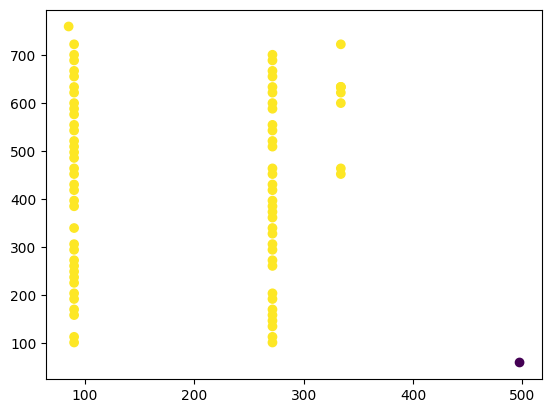

In [158]:
plt.scatter(df["textMatrix4"], df["textMatrix5"], c=df["fontSize"])

In [159]:
X=np.array(df[["textMatrix4","textMatrix5"]])
af = AffinityPropagation().fit(X=X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
n_clusters_

7

0 {'color': array([0.267004, 0.004874, 0.329415, 1.      ])}
1 {'color': array([0.267968, 0.223549, 0.512008, 1.      ])}
2 {'color': array([0.190631, 0.407061, 0.556089, 1.      ])}
3 {'color': array([0.127568, 0.566949, 0.550556, 1.      ])}
4 {'color': array([0.20803 , 0.718701, 0.472873, 1.      ])}
5 {'color': array([0.565498, 0.84243 , 0.262877, 1.      ])}
6 {'color': array([0.993248, 0.906157, 0.143936, 1.      ])}


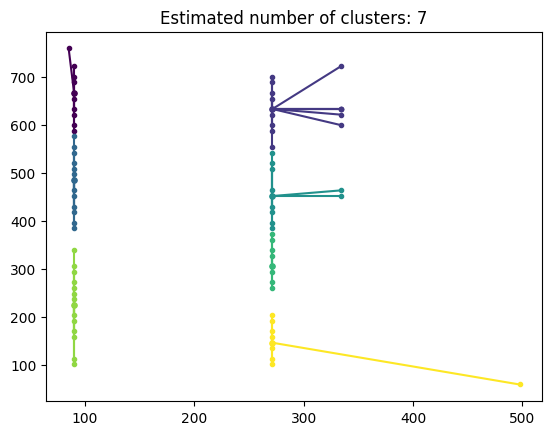

In [160]:
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters_)))

for k, col in zip(range(n_clusters_), colors):
    print(k, col)
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()